In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import cv2
import imghdr

In [6]:
data_dir = pathlib.Path('C:/datascince/ImageClassification/fooddata')

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 101000 files belonging to 101 classes.


In [8]:
class_names = data.class_names
print(class_names)

['Apple Pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [7]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


In [8]:
batch[0].shape

(32, 256, 256, 3)

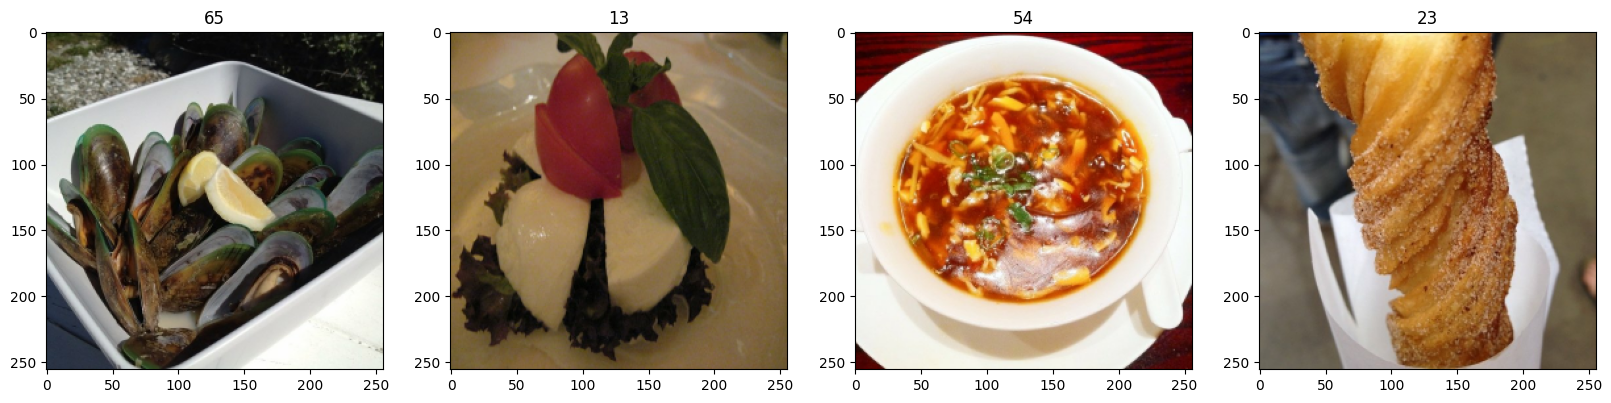

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
data1 = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [11]:
data_iterator1 = data1.as_numpy_iterator()
batch1 = data_iterator1.next()

In [12]:
batch1[0].max()

1.0

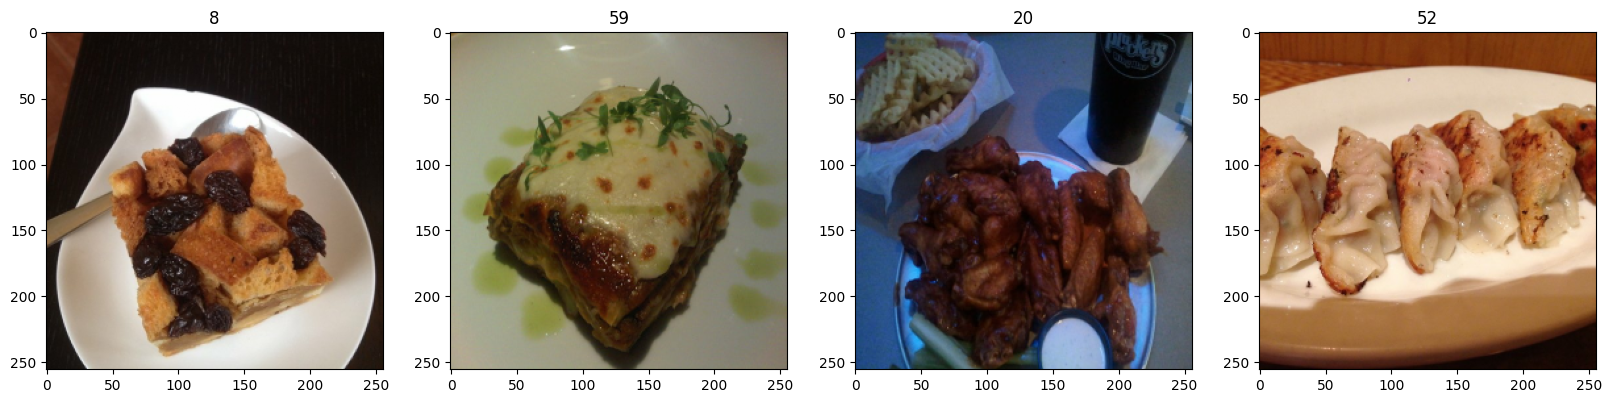

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch1[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch1[1][idx])

In [14]:
len(data1)

3157

In [15]:
train_size = int(len(data1)*.7)
val_size = int(len(data1)*.2)+1
test_size = int(len(data1)*.1)+1

In [16]:
print(train_size,val_size,test_size)

2209 632 316


In [17]:
train = data1.take(train_size)
val = data1.skip(train_size).take(val_size)
test = data1.skip(train_size+val_size).take(test_size)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2209/2209 [==============================] - 2149s 972ms/step - loss: -33666657347960832.0000 - accuracy: 0.0099 - val_loss: -182432859066204160.0000 - val_accuracy: 0.0097
Epoch 2/20
2209/2209 [==============================] - 2004s 907ms/step - loss: -1203106788711333888.0000 - accuracy: 0.0100 - val_loss: -3092012514771206144.0000 - val_accuracy: 0.0098
Epoch 3/20
2209/2209 [==============================] - 1888s 854ms/step - loss: -7867082662551224320.0000 - accuracy: 0.0099 - val_loss: -14737131479570055168.0000 - val_accuracy: 0.0098
Epoch 4/20
2209/2209 [==============================] - 1994s 903ms/step - loss: -27517112470489530368.0000 - accuracy: 0.0100 - val_loss: -44134832145533239296.0000 - val_accuracy: 0.0098
Epoch 5/20
2209/2209 [==============================] - 2044s 925ms/step - loss: -70847414365793026048.0000 - accuracy: 0.0099 - val_loss: -103651532896489963520.0000 - val_accuracy: 0.0099
Epoch 6/20
2209/2209 [==============================] - 2289s 

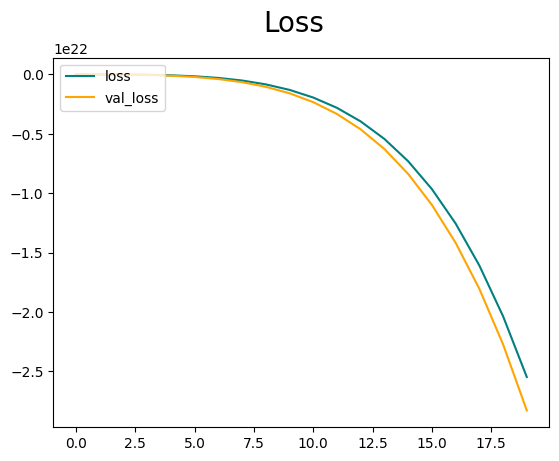

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

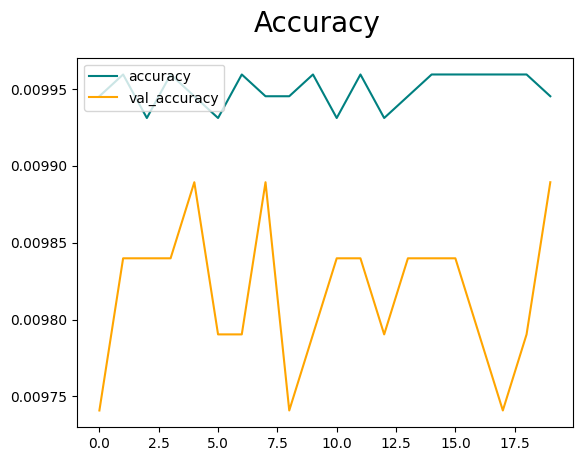

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 208ms/step


In [31]:
print(f'Presssion:{pre.result().numpy()},Recall:{re.result().numpy()},accuracy:{ acc.result().numpy()}')

Presssion:0.9914750456809998,Recall:1.0,accuracy:0.009813640266656876


In [32]:
sunflower_path = 'C:/datascince/fooddata/atest.jpg'

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(256, 256)
)


In [33]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch





In [34]:
predictions = model.predict(img_array)


1/1 [==============================] - 0s 38ms/step


In [35]:
score = tf.nn.softmax(predictions[0])

In [36]:
print(score)

tf.Tensor([1.], shape=(1,), dtype=float32)


In [37]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to apple_pie with a 100.00 percent confidence.


In [38]:
from tensorflow.keras.models import load_model

In [39]:
model.save(os.path.join('models','imageclassifier.h5'))

In [9]:
from tensorflow.keras.models import load_model

In [11]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

In [12]:
sunflower_path = 'C:/datascince/fooddata/atest.jpg'

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


In [18]:
imshow(img)

NameError: name 'imshow' is not defined

In [14]:
predictions = new_model.predict(img_array)

1/1 [==============================] - 0s 500ms/step


In [15]:
score = tf.nn.softmax(predictions[0])

In [16]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Apple Pie with a 100.00 percent confidence.
